In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("D:/Superstore.csv",encoding='ISO-8859-1')
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [7]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'])

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [13]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['Profit'])
y = df['Profit']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [19]:
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=[('rf', rf_model), ('xgb', xgb_model)], final_estimator=meta_model)


In [23]:
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [25]:
stacking_model.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=LinearRegression())

In [57]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_stacked = stacking_model.predict(X_test_scaled)

In [58]:
metrics = {
    'Model': ['Random Forest', 'XGBoost', 'Stacking'],
    'R^2': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, y_pred_stacked)],
    'MSE': [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, y_pred_stacked)]
}

In [61]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


           Model       R^2           MSE
0  Random Forest -0.073339  52040.986996
1        XGBoost  0.810165   9204.165292
2       Stacking  0.285380  34648.417113


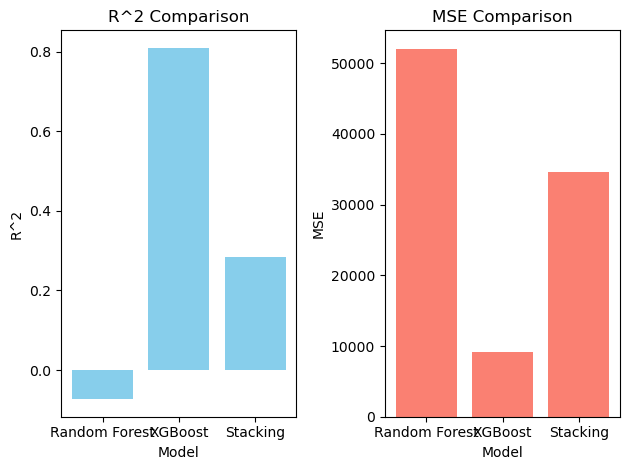

In [65]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['R^2'], color='skyblue')
plt.title('R^2 Comparison')
plt.xlabel('Model')
plt.ylabel('R^2')

plt.subplot(1, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['MSE'], color='salmon')
plt.title('MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()